In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [24]:
sns.get_dataset_names()


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [25]:
dataset = sns.load_dataset('mpg')
dataset.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


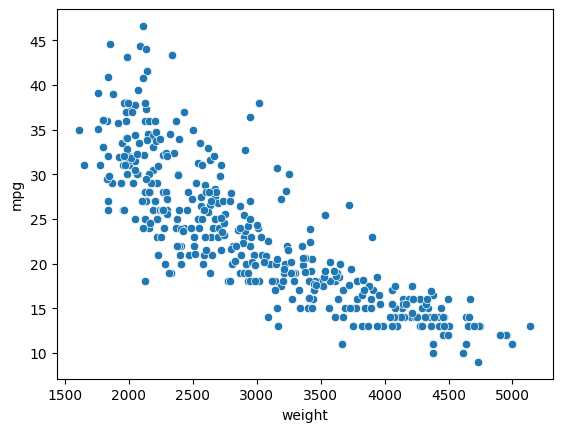

In [26]:
sns.scatterplot(x='weight', y='mpg', data=dataset)
plt.show()

Podemnos ver que entre mas ligero el vehículo mas mpg puede alcanzar, por lo que podemos afirmar que hay causalidad, ya el peso incrementa la dificultad de tener un mpg alto, por lo que la correlación es media o fuerte.

In [27]:
#Quitamos la columna origin, name para evitar errores, no aporta mucho a la correlación por lo que no debe afectar al caso de estudio

dataset = dataset.drop(['origin', 'name'], axis=1)

In [28]:
korrelasi = dataset.corr()
korrelasi

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<Axes: >

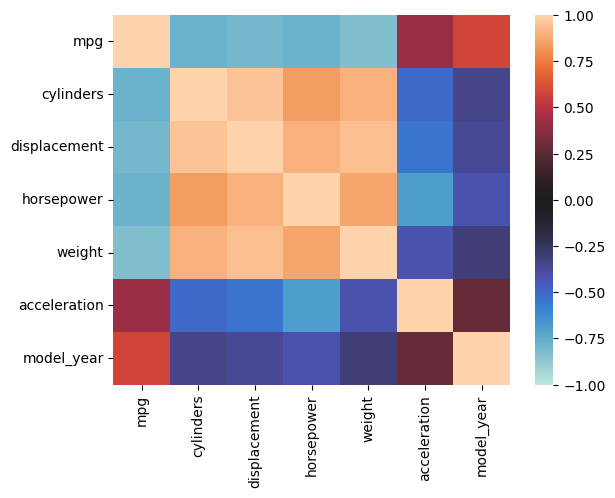

In [29]:
sns.heatmap(korrelasi, vmax=1, vmin=-1, center=0)

In [32]:
#hacemos lo mismo pero con la correlación de spearman
korrelasiSpearman = dataset.corr(method='spearman')
korrelasiSpearman

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.821864,-0.855692,-0.853616,-0.874947,0.438677,0.573469
cylinders,-0.821864,1.000000,0.911876,0.816188,0.873314,-0.474189,-0.335012
displacement,-0.855692,0.911876,1.000000,0.876171,0.945986,-0.496512,-0.305257
horsepower,-0.853616,0.816188,0.876171,1.000000,0.878819,-0.658142,-0.389498
weight,-0.874947,0.873314,0.945986,0.878819,1.000000,-0.404550,-0.277015
acceleration,0.438677,-0.474189,-0.496512,-0.658142,-0.404550,1.000000,0.274632
model_year,0.573469,-0.335012,-0.305257,-0.389498,-0.277015,0.274632,1.000000


<Axes: >

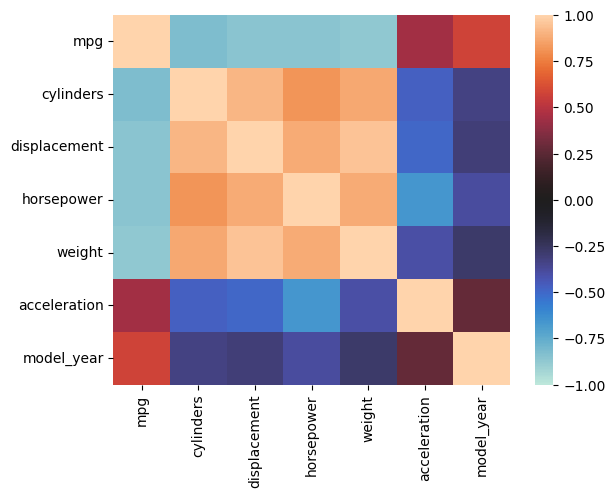

In [33]:
sns.heatmap(korrelasiSpearman, vmax=1, vmin=-1, center=0)

No hay muchas diferencias con la gráfica anterior.

In [34]:
#hacemos lo mismo pero con la correlación de kendall
korrelasiKendall = dataset.corr(method='kendall')
korrelasiKendall


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.686477,-0.679847,-0.679166,-0.694006,0.301096,0.413661
cylinders,-0.686477,1.000000,0.794854,0.686146,0.735481,-0.367194,-0.273742
displacement,-0.679847,0.794854,1.000000,0.718471,0.800508,-0.352110,-0.218920
horsepower,-0.679166,0.686146,0.718471,1.000000,0.703730,-0.488239,-0.277831
weight,-0.694006,0.735481,0.800508,0.703730,1.000000,-0.268619,-0.196863
acceleration,0.301096,-0.367194,-0.352110,-0.488239,-0.268619,1.000000,0.196024
model_year,0.413661,-0.273742,-0.218920,-0.277831,-0.196863,0.196024,1.000000


<Axes: >

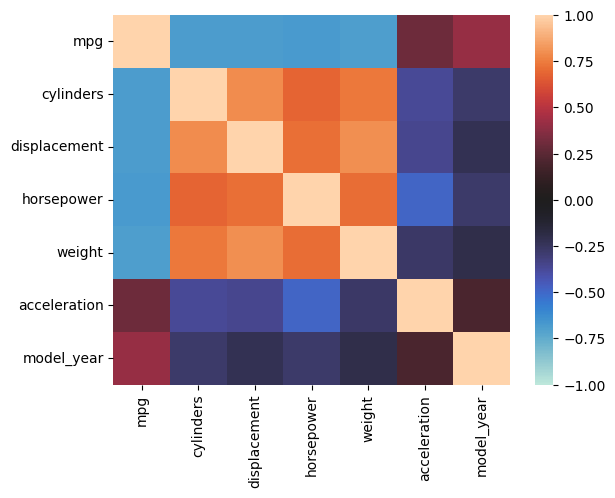

In [35]:
sns.heatmap(korrelasiKendall, vmax=1, vmin=-1, center=0)

Con esto podemos ver una ligera diferencia, vemos que hay buena correlación en variables como los cilindirs, el displacement y los caballos de fuerza, por lo que podemos afirmar que estas son las variables mas significativas en cuanto a la mpg.